In [ ]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [4]:
df = pd.read_csv('D:\huwawi\project\WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(df.head()) 

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18272\1341600494.py:1: SyntaxWarning: invalid escape sequence '\h'
  df = pd.read_csv('D:\huwawi\project\WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [ ]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# calculate correlation

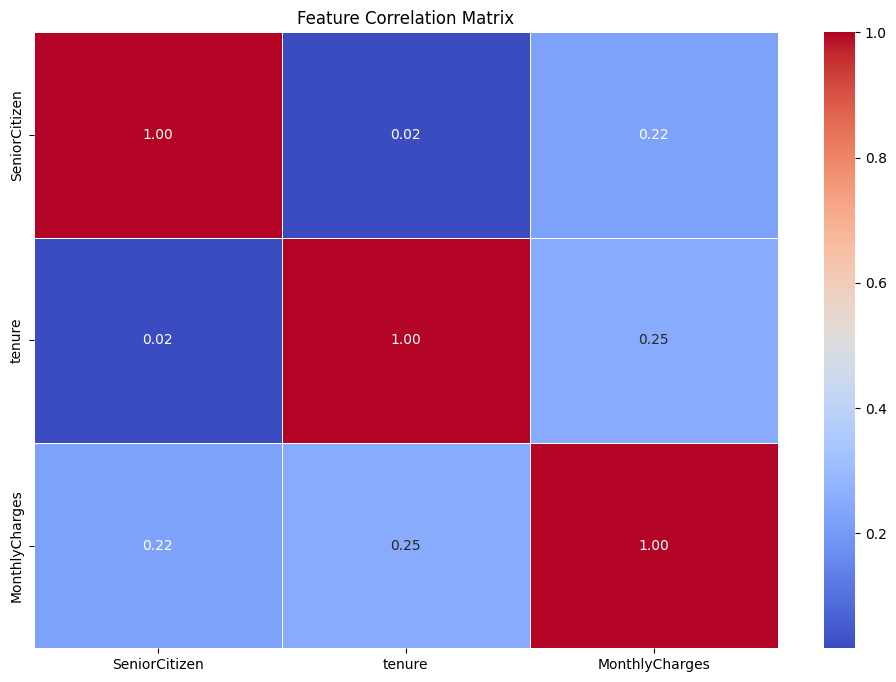

In [252]:
def plot_correlation(df):
    
    
    plt.figure(figsize=(12, 8))
    numeric_df = df.select_dtypes(include=['number'])
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Matrix")
    plt.show()


plot_correlation(df)

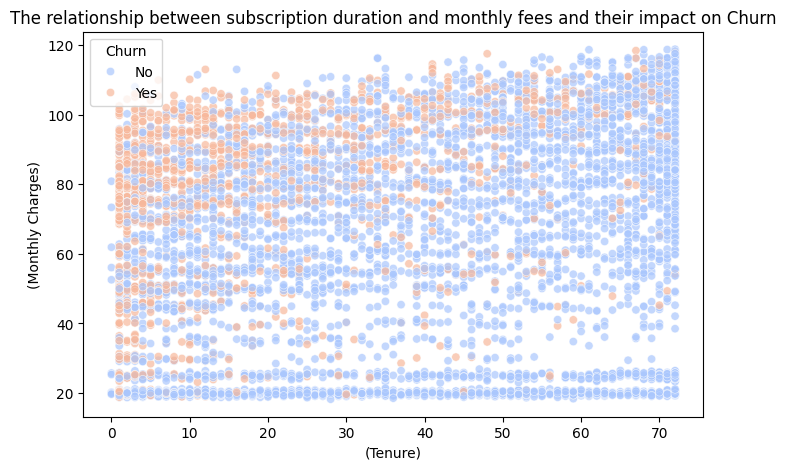

In [253]:
df.rename(columns={'tenure': 'Tenure'}, inplace=True)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Tenure'], y=df['MonthlyCharges'], hue=df['Churn'], palette='coolwarm', alpha=0.7)
plt.title('The relationship between subscription duration and monthly fees and their impact on Churn')
plt.xlabel('(Tenure)')
plt.ylabel('(Monthly Charges)')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21432\2784585497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df['TotalCharges'], palette='coolwarm')


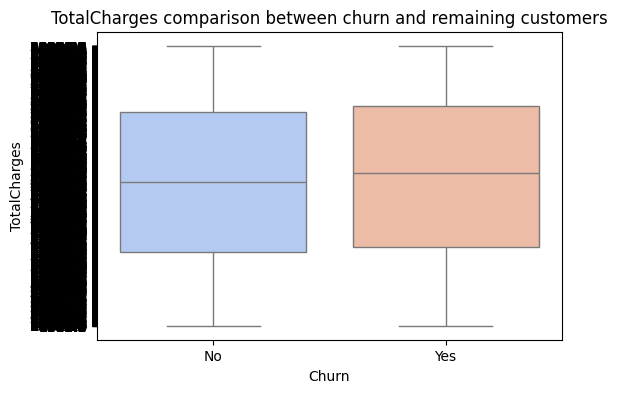

In [254]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Churn'], y=df['TotalCharges'], palette='coolwarm')
plt.title('TotalCharges comparison between churn and remaining customers')
plt.show()


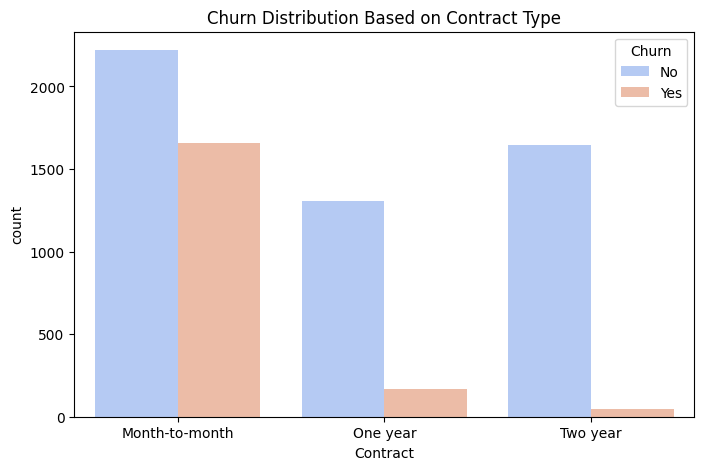

In [255]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn Distribution Based on Contract Type')
plt.show()


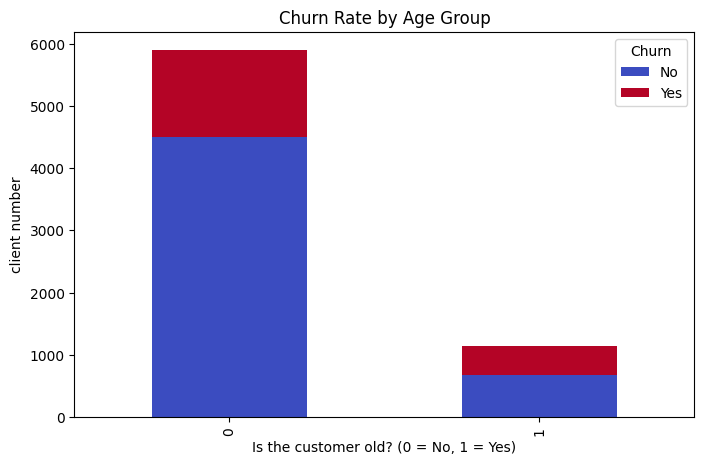

In [256]:
churn_rates = df.groupby(['SeniorCitizen', 'Churn'])['Churn'].count().unstack()
churn_rates.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title('Churn Rate by Age Group')
plt.xlabel('Is the customer old? (0 = No, 1 = Yes)')
plt.ylabel('client number')
plt.show()


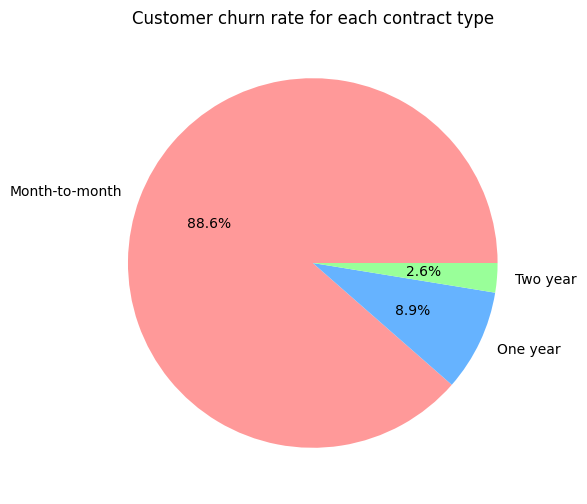

In [257]:
contract_churn = df[df['Churn'] == 'Yes']['Contract'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(contract_churn, labels=contract_churn.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Customer churn rate for each contract type')
plt.show()




# preprocessing

In [258]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


In [259]:
print("Numerical Columns is " , numeric_cols)

Numerical Columns is  Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges'], dtype='object')


In [260]:
print("Categorical  Columns is " , categorical_cols)

Categorical  Columns is  Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [261]:
df.drop(columns=['customerID'], inplace=True, errors='ignore')


# label encoder on data

In [262]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
               'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])  


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)  

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21432\2884925975.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [263]:

from imblearn.over_sampling import SMOTE

available_columns = [col for col in ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                     'StreamingTV', 'StreamingMovies', 'Contract', 
                                     'PaymentMethod'] if col in df.columns]
df = pd.get_dummies(df, columns=available_columns, drop_first=True)

columns_to_drop = [col for col in df.columns if 'No internet service' in col or 'No phone service' in col]
df = df.drop(columns=columns_to_drop, errors='ignore')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

bool_cols = ['OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 
             'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 
             'Contract_Two year']
df[bool_cols] = df[bool_cols].astype(int)

scaler = MinMaxScaler()
num_cols = ['TotalCharges', 'MonthlyCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

X_resampled, y_resampled = SMOTE(sampling_strategy='auto', random_state=42).fit_resample(df.drop(columns=['Churn']), df['Churn'])


C:\Users\lenovo\AppData\Local\Temp\ipykernel_21432\2824105524.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [264]:
print(df.head()) 

   gender  SeniorCitizen  Partner  Dependents  Tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1        0.115423      0.001275      0  ...   
1                 0        0.385075      0.215867      0  ...   
2                 1        0.354229      0.010310      1  ...   
3                 0        0.239303      0.210241      0  ...   
4                 1        0.521891      0.015330      1  ...   

   OnlineBackup_Yes  DeviceProtection_Yes  TechSupport_Yes  StreamingTV_Yes  \
0                 1                     0                0                0   
1                 0     

# Outliers Handling

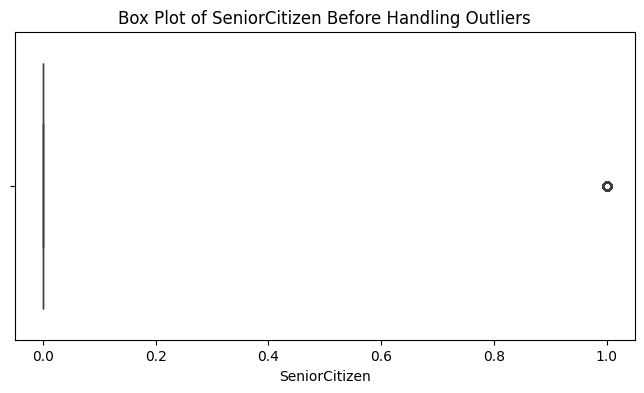

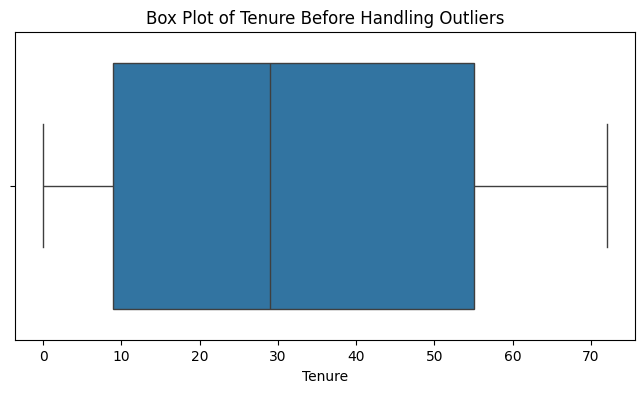

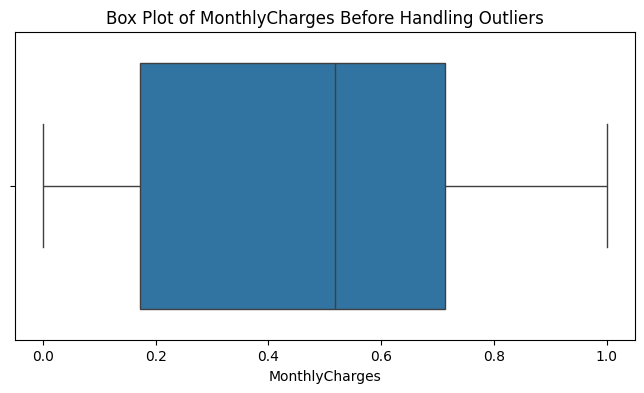

In [265]:
for column in numeric_cols:
    # Box plot before handling outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot of {column} Before Handling Outliers")
    plt.show()

In [266]:
processed_df = df.copy()
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = processed_df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:", numeric_cols)  
for column in numeric_cols:
    

    Q1 = processed_df[column].quantile(0.25)  
    Q3 = processed_df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  

    # استبدال القيم المتطرفة بالوسيط
    processed_df[column] = np.where(
        (processed_df[column] < lower_bound) | (processed_df[column] > upper_bound),
        processed_df[column].median(),  # استبدال القيم المتطرفة بالوسيط
        processed_df[column]
    )

    # Box plot بعد استبدال القيم المتطرفة
    

# عرض البيانات بعد معالجة القيم المتطرفة
print("\nData after handling outliers using box plot:")
print(processed_df.head())


Numeric Columns: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year',
       'Contract_Two year'],
      dtype='object')

Data after handling outliers using box plot:
   gender  SeniorCitizen  Partner  Dependents  Tenure  PhoneService  \
0     0.0            0.0      1.0         0.0     1.0           1.0   
1     1.0            0.0      0.0         0.0    34.0           1.0   
2     1.0            0.0      0.0         0.0     2.0           1.0   
3     1.0            0.0      0.0         0.0    45.0           1.0   
4     0.0            0.0      0.0         0.0     2.0           1.0   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0               1.0        0.115423      0.001275    0.0  ...   
1               0.0        0.38507

 # TRAIN DATA BEFORE APPLY MODELS 

In [267]:


X = df.drop(columns=['Churn'])  
y = df['Churn'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()  
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print( X_train_scaled.shape)
print( X_test_scaled.shape)
print( y_train.mean())
print( y_test.mean())


(5634, 23)
(1409, 23)
0.2653532126375577
0.2654364797728886


# 1_Logistic REGRATION 

In [268]:


X = df.drop(columns=['Churn'])
y = df['Churn'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f" Model Accuracy: {accuracy_percentage:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

 Model Accuracy: 82.26%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



# Decision Tree


Model Evaluation Results:
Accuracy: 0.81
Confusion Matrix:
[[964  72]
 [201 172]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.46      0.56       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



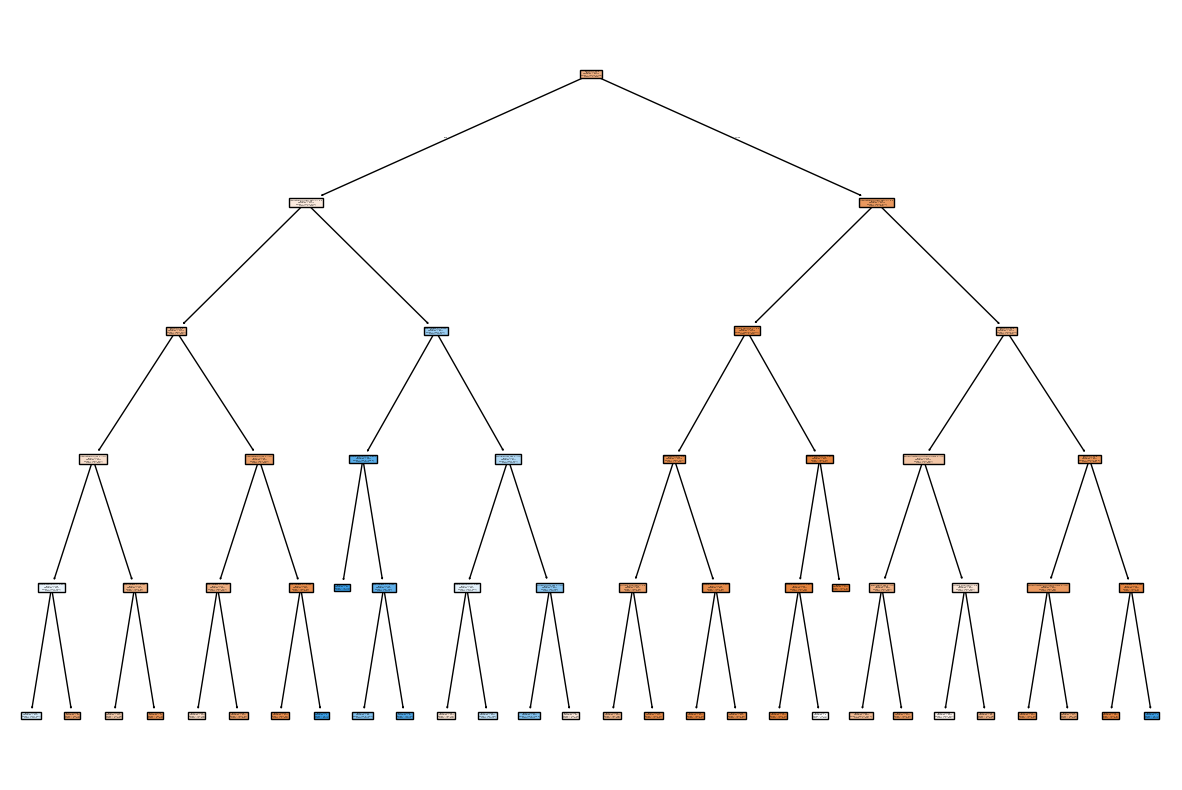

In [269]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Evaluation Results:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(15, 10))
plot_tree(dtree, feature_names=X.columns, class_names=["<=50K", ">50K"], filled=True)
plt.show()


# random forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=5, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Evaluation Results:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Model Evaluation Results:
Accuracy: 0.78
Confusion Matrix:
[[862 173]
 [137 237]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1035
           1       0.58      0.63      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.73      1409
weighted avg       0.79      0.78      0.78      1409



# svm

In [271]:
# Importing required libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_classifier = SVC(kernel='rbf', C=1.0)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.7860861334595362

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86      1539
           1       0.68      0.40      0.51       574

    accuracy                           0.79      2113
   macro avg       0.74      0.67      0.68      2113
weighted avg       0.77      0.79      0.77      2113



# 3 models deeplearning 

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5668 - loss: 0.7437 - val_accuracy: 0.7722 - val_loss: 0.4803
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7650 - loss: 0.4774 - val_accuracy: 0.7842 - val_loss: 0.4436
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7719 - loss: 0.4646 - val_accuracy: 0.7864 - val_loss: 0.4338
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7763 - loss: 0.4544 - val_accuracy: 0.7928 - val_loss: 0.4326
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7800 - loss: 0.4465 - val_accuracy: 0.7892 - val_loss: 0.4334
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7929 - loss: 0.4371 - val_accuracy: 0.7921 - val_loss: 0.4299
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 0.4409 - val_accuracy: 0.8013 - val_loss: 0.4276
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7906 - loss: 0.4442 - val_accuracy: 0.

Dense Neural Network Accuracy: 80.13%


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7156 - loss: 0.6050 - val_accuracy: 0.7346 - val_loss: 0.5481
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7208 - loss: 0.5563 - val_accuracy: 0.7346 - val_loss: 0.5253
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7418 - loss: 0.5113 - val_accuracy: 0.7346 - val_loss: 0.5061
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7346 - loss: 0.5070 - val_accuracy: 0.7473 - val_loss: 0.4846
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7391 - loss: 0.4870 - val_accuracy: 0.7488 - val_loss: 0.4729
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7544 - loss: 0.4638 - val_accuracy: 0.7651 - val_loss: 0.4828
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7511 - loss: 0.4718 - val_accuracy: 0.7658 - val_loss: 0.4715
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7598 - loss: 0.4669 - val_accu

LSTM Model Accuracy: 79.21%
Epoch 1/50


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7314 - loss: 0.5114 - val_accuracy: 0.7864 - val_loss: 0.4350
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4247 - val_accuracy: 0.7835 - val_loss: 0.4327
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8082 - loss: 0.4123 - val_accuracy: 0.7984 - val_loss: 0.4285
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8089 - loss: 0.4122 - val_accuracy: 0.7977 - val_loss: 0.4300
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8101 - loss: 0.4127 - val_accuracy: 0.7984 - val_loss: 0.4241
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7984 - loss: 0.4167 - val_accuracy: 0.7991 - val_loss: 0.4259
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8010 - loss: 0.4225 - val_accuracy: 0.7984 - val_loss: 0.4247
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8118 - loss: 0.4097 - val_accuracy: 0.7991 - val_

CNN Model Accuracy: 79.49%


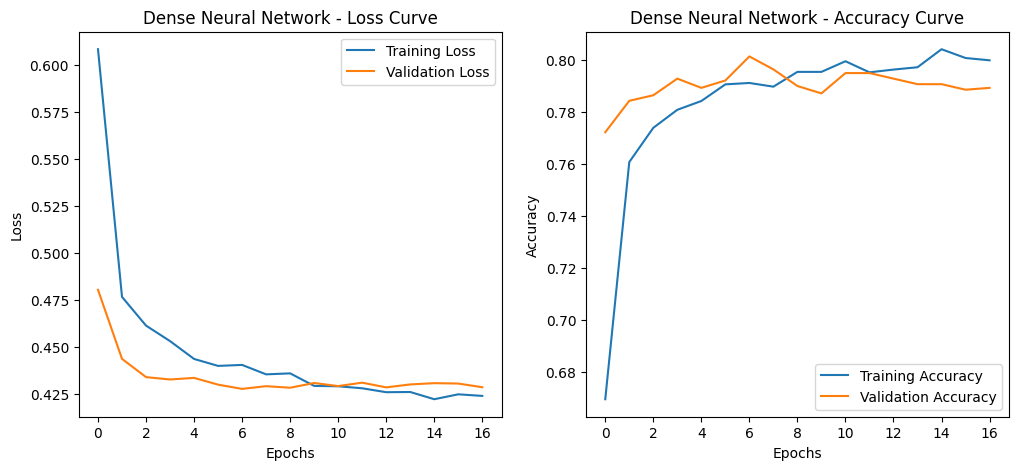

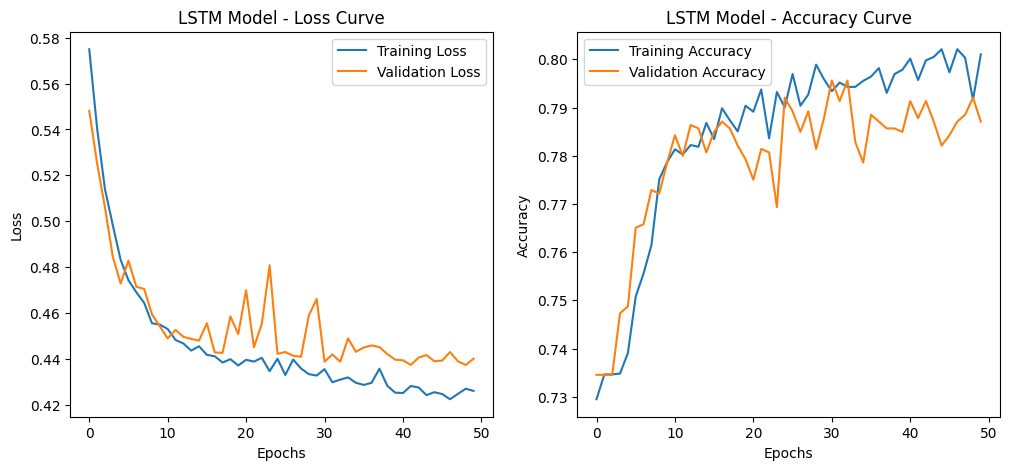

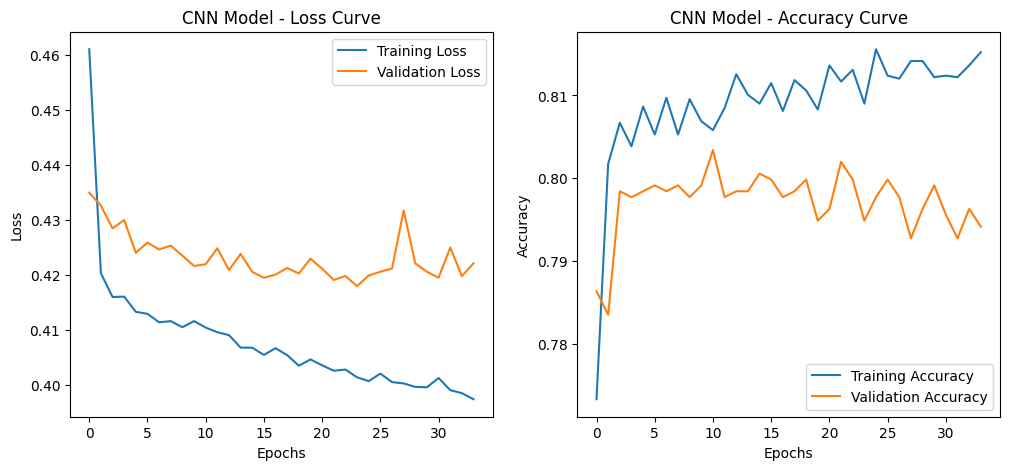

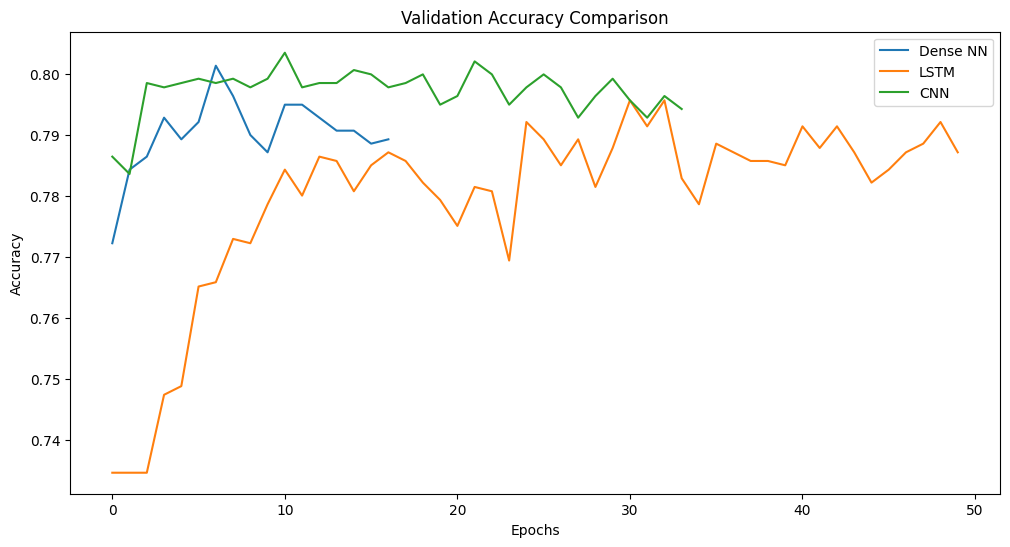

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Churn'])
y = df['Churn'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ------------------------ Dense Neural Network ------------------------
model_dense = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_dense.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

history_dense = model_dense.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

dense_loss, dense_acc = model_dense.evaluate(X_test, y_test, verbose=0)
print(f'Dense Neural Network Accuracy: {dense_acc * 100:.2f}%')

model_dense.save("dense_model.h5")

# ------------------------ LSTM Model ------------------------
model_lstm = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

history_lstm = model_lstm.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test), verbose=1, callbacks=[early_stopping])

lstm_loss, lstm_acc = model_lstm.evaluate(X_test_rnn, y_test, verbose=0)
print(f'LSTM Model Accuracy: {lstm_acc * 100:.2f}%')

model_lstm.save("lstm_model.h5")

# ------------------------ CNN Model ------------------------
model_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_cnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

history_cnn = model_cnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test), verbose=1, callbacks=[early_stopping])

cnn_loss, cnn_acc = model_cnn.evaluate(X_test_rnn, y_test, verbose=0)
print(f'CNN Model Accuracy: {cnn_acc * 100:.2f}%')

model_cnn.save("cnn_model.h5")

def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_history(history_dense, "Dense Neural Network")
plot_history(history_lstm, "LSTM Model")
plot_history(history_cnn, "CNN Model")

plt.figure(figsize=(12, 6))
plt.plot(history_dense.history['val_accuracy'], label='Dense NN')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM')
plt.plot(history_cnn.history['val_accuracy'], label='CNN')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Fine-Tuning


===== Model Performance =====
Logistic Regression Accuracy: 80.13%
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

SVM Accuracy: 76.65%
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1035
           1       0.55      0.68      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.77      1409

Decision Tree Accuracy: 73.17%
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1035
           1       0.50      0.62      0.55       374

    accuracy                           0.73      1409
   macro

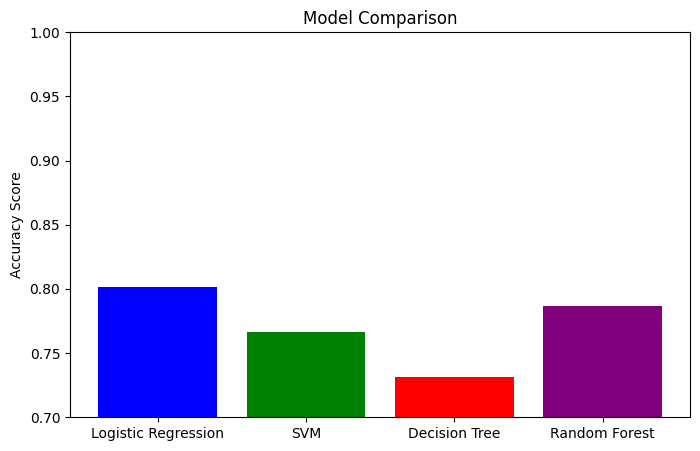

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


X = df.drop(columns=['Churn'])
y = df['Churn'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Logistic Regression**
log_reg_params = {'C': np.logspace(-3, 3, 10)}
log_reg_model = RandomizedSearchCV(LogisticRegression(max_iter=500), log_reg_params, cv=5, n_iter=5, random_state=42)
log_reg_model.fit(X_train_scaled, y_train)
log_reg_best = log_reg_model.best_estimator_
log_reg_pred = log_reg_best.predict(X_test_scaled)

# SVM**
svm_params = {'C': np.logspace(-3, 3, 10), 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}
svm_model = RandomizedSearchCV(SVC(class_weight='balanced'), svm_params, cv=5, n_iter=5, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_best = svm_model.best_estimator_
svm_pred = svm_best.predict(X_test_scaled)

# Decision Tree**
dt_params = {'max_depth': np.arange(5, 20, 5), 'min_samples_split': [2, 5, 10, 20]}
dt_model = RandomizedSearchCV(DecisionTreeClassifier(class_weight='balanced'), dt_params, cv=5, n_iter=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_best = dt_model.best_estimator_
dt_pred = dt_best.predict(X_test)

#Random Forest**
rf_params = {'n_estimators': np.arange(100, 500, 100), 'max_depth': np.arange(10, 30, 10), 'min_samples_split': [2, 5, 10]}
rf_model = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced'), rf_params, cv=5, n_iter=5, random_state=42)
rf_model.fit(X_train, y_train)
rf_best = rf_model.best_estimator_
rf_pred = rf_best.predict(X_test)


models = {
    "Logistic Regression": log_reg_pred,
    "SVM": svm_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred
}

print("\n===== Model Performance =====")
for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))
    print("=" * 40)

accuracies = [accuracy_score(y_test, log_reg_pred),
              accuracy_score(y_test, svm_pred),
              accuracy_score(y_test, dt_pred),
              accuracy_score(y_test, rf_pred)]

plt.figure(figsize=(8, 5))
plt.bar(models.keys(), accuracies, color=['blue', 'green', 'red', 'purple'])
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.ylim(0.7, 1)
plt.show()
